<h3>ECEN 758 Project: Fashion MNIST Classification Using Baseline CNN: A Deep Learning Approach</h3>

<h4>
Steps to run:
Run all the steps in order.
If there are import errors due to some conflicts with pre-existing packages,please open the same file in google colab and run the file
the weights file required is attached along with the repo.Please check the destination of the weights file if not saved in the same directory as this demo file.If in the same folder,continue with the execution.
</h4>

In [1]:
!pip install keras
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

d:\TAMU\SemesterStudies\Sem1\ECEN758-Mr.Joshua_Peeples_DS_Data_Mining_and_Analysis\Project\Ecen758-Project\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\TAMU\SemesterStudies\Sem1\ECEN758-Mr.Joshua_Peeples_DS_Data_Mining_and_Analysis\Project\Ecen758-Project\.venv\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model weights loaded from 'model_weights.weights.h5'
Test Accuracy (loaded weights): 90.470%
Confusion Matrix:
[[771   1  13  33   7   1 167   0   7   0]
 [  2 971   0  17   7   0   2   0   1   0]
 [ 11   0 806  11 105   0  67   0   0   0]
 [  3   2   8 907  52   0  27   0   1   0]
 [  0   0  21  14 931   0  33   0   1   0]
 [  0   0   0   0   0 972   0  17   1  10]
 [ 52   0  38  28  87   0 789   0   6   0]
 [  0   0   0   0   0  10   0 973   0  17]
 [  3   1   4   6   4   1   7   4 970   0]
 [  0   0   0   0   0   6   1  36   0 957]]


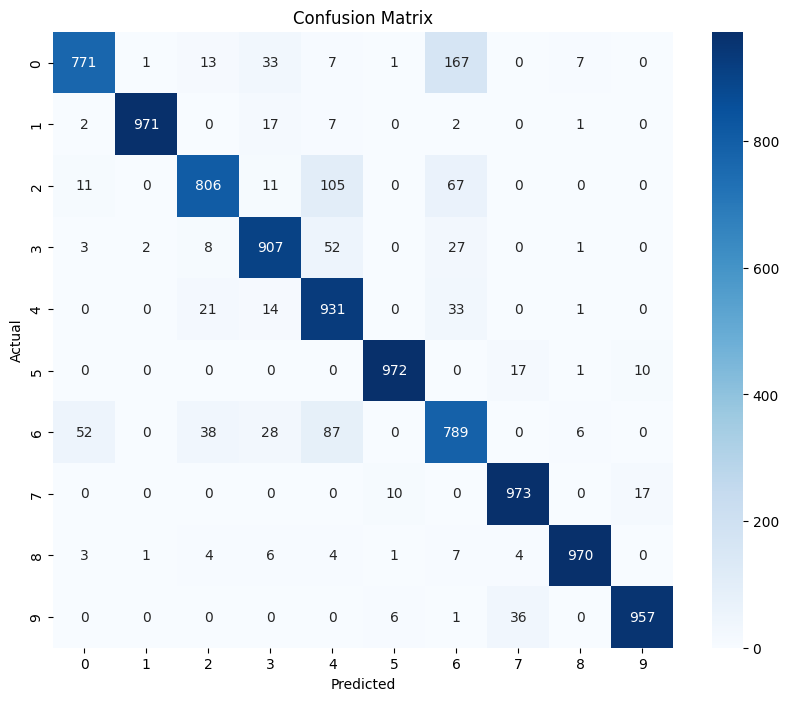


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.77      0.84      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.91      0.81      0.85      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.78      0.93      0.85      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.72      0.79      0.75      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000



In [2]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load train and test dataset
def load_dataset():
    # load dataset
    _, (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    testY_onehot = to_categorical(testY)
    return testX, testY, testY_onehot

# Scale pixels
def prep_pixels(test):
    # convert from integers to floats
    test_norm = test.astype('float32')
    test_norm = test_norm / 255.0
    # return normalized images
    return test_norm

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load model weights, evaluate, and display metrics
def load_and_evaluate():
    # Load dataset
    testX, testY, testY_onehot = load_dataset()
    # Preprocess pixel values
    testX = prep_pixels(testX)
    # Define model
    model = define_model()
    # Load the saved weights
    model.load_weights('model_weights.weights.h5')
    print("Model weights loaded from 'model_weights.weights.h5'")

    # Evaluate the model on the test dataset
    _, accuracy = model.evaluate(testX, testY_onehot, verbose=0)
    print(f'Test Accuracy (loaded weights): {accuracy * 100.0:.3f}%')

    # Get predictions and convert from one-hot encoding
    y_pred = model.predict(testX, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate and display confusion matrix
    cm = confusion_matrix(testY, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate and display precision, recall, and F1-score
    report = classification_report(testY, y_pred_classes, target_names=[f'Class {i}' for i in range(10)])
    print("\nClassification Report:")
    print(report)


if __name__ == "__main__":
    # Run the evaluation
    load_and_evaluate()
